In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Faz a leitura do CSV
df = pd.read_csv('AgeDatasetClean.csv', sep = '|')
df

,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Age of death
0,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,67.0
1,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,49.0
2,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,56.0
3,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,35.0
4,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,57.0
...,...,...,...,...,...,...,...,...
732956,Wim de Vreng,Dutch swimmer,Male,Kingdom of the Netherlands,Athlete,1930,1980.0,50.0
732957,James Smillie,goudsmid uit Schotland (1784-1841),Male,Scotland,Goldsmith,1784,1841.0,57.0
732958,Gustav Siber,entrepreneur from Switzerland,Male,Switzerland,Entrepreneur,1857,1924.0,67.0
732959,Reginald Oswald Pearson,"English artist, working in stained glass, prin...",Male,United Kingdom,Artist,1887,1915.0,28.0


In [3]:
## Verificando as linhas duplicadas 
df[df.duplicated()]

,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Age of death
660898,August Mercadé Ramon,Spanish economist and journalist (1909-1967),Male,Spain,Businessperson,1909,1967.0,58.0
668982,Andrée Dupeyron,French aviator,Female,France,Military personnel,1902,1988.0,86.0


In [4]:
## Remove as duplicadas
df.drop_duplicates(inplace=True)

In [5]:
## Verifica os as ocupacoes
df['Occupation'].value_counts()

Artist                                                     207322
Politician                                                 152916
Athlete                                                     92645
Researcher                                                  63799
Military personnel                                          36024
                                                            ...  
Ballet dancer; choreographer; french resistance fighter         1
Master craftsman; chair-maker; furniture designer               1
Stevedore; civil libertarianism                                 1
Mountaineer; paraglider pilot                                   1
Director; scout leader                                          1
Name: Occupation, Length: 7750, dtype: int64

In [6]:
#Funcao para evidenciar as linhas com 2 ou mais ocupacoes declaradas
df['Occupation Count'] = df['Occupation'].apply(lambda x: len(x.split(";"))).astype('int')

In [7]:
df[df['Occupation Count'] > 2]

,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Age of death,Occupation Count
536,James Cook,"British explorer, navigator",Male,Kingdom of Great Britain,Cartographer; naval officer; explorer; seafarer,1728,1779.0,51.0,4
537,Hernán Cortés,Spanish conquistador,Male,Spain; Spanish Empire; Habsburg Spain,Conquistador; governor; explorer,1485,1547.0,62.0,3
605,Emperor Shenzong of Song,6th emperor of the Northern Song Dynasty,Male,Song dynasty,Monarch; ruler; aristocrat,1048,1085.0,37.0,3
771,"Diana, Princess of Wales","first wife of Charles, Prince of Wales (1961-1...",Female,United Kingdom,Socialite; environmentalist; philanthropist; h...,1961,1997.0,36.0,4
1262,Odo Bujwid,Polish biologist and esperantist,Male,Poland,Esperantist; biologist; microbiologist,1857,1942.0,85.0,3
...,...,...,...,...,...,...,...,...,...
731205,Albert Razin,Russian ethnographer and Udmurt language activist,Male,Russia; Soviet Union,Public figure; sociologist; philosopher; ethno...,1940,2019.0,79.0,5
731515,Innocent-Vincze Ernő,Hongaars toneelschrijver (1903-1978),Male,Hungary,Playwright; dramaturge; lyricist,1903,1978.0,75.0,3
732074,Vera Collum,British suffragist and anthropologist,Female,United Kingdom,Radiographer; anthropologist; suffragist,1883,1957.0,74.0,3
732395,Margaret Auld,"Scottish nurse, Matron and Chief Nursing Offic...",Female,Scotland,Nurse; civil servant; matron,1932,2010.0,78.0,3


In [8]:
df['Occupation Count'].value_counts()

1    721078
2      9959
3      1569
4       272
5        66
6        10
7         4
8         1
Name: Occupation Count, dtype: int64

In [9]:
#Dropas as linhas com 2 ou mais ocupacoees declaradas
df.drop(df[df['Occupation'].apply(lambda x: len(x.split(';'))) > 1].index, inplace=True)

In [10]:
## Verifica os as ocupacoes novamente doublecheck
df['Occupation'].value_counts()

Artist                207322
Politician            152916
Athlete                92645
Researcher             63799
Military personnel     36024
                       ...  
Executive producer         1
Childcare worker           1
Molfar                     1
Tipster                    1
Radiographer               1
Name: Occupation, Length: 1944, dtype: int64

In [11]:
#busca as 10 ocupacoes que mais aparecem
top_occupation = df['Occupation'].value_counts()[:10]

In [12]:
top_occupation

Artist                207322
Politician            152916
Athlete                92645
Researcher             63799
Military personnel     36024
Religious figure       18538
Architect              12588
Businessperson         12107
Journalist             10929
Teacher                10769
Name: Occupation, dtype: int64

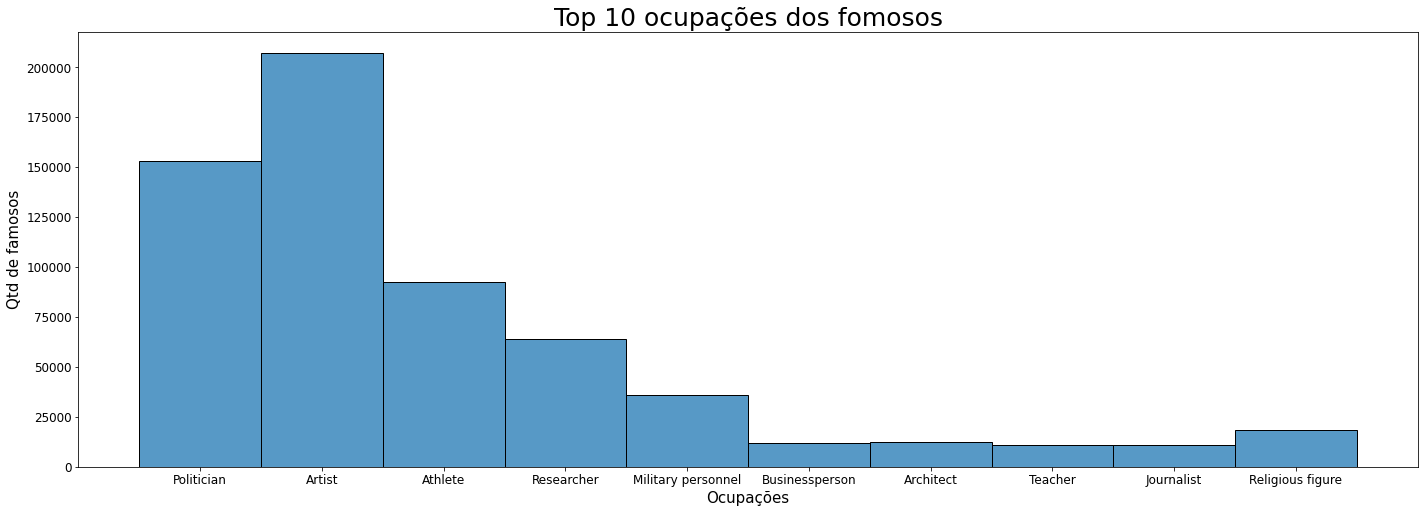

In [13]:
# Ajustando o tamanho da Figura

plt.figure(figsize = (24, 8)) ## Tamanho da figura em polegadas

df_occupation = df[df.Occupation.isin(top_occupation.index)]
sns.histplot(df_occupation, x=df_occupation.Occupation)

# Coloca o titulo
plt.title('Top 10 ocupações dos fomosos', fontsize = 25)

# Titulo para eixo X
plt.xlabel('Ocupações', fontsize=15)

# Titulo para eixo Y
plt.ylabel('Qtd de famosos', fontsize=15)

# Tamanho da fonte da grade X
plt.xticks(fontsize = 12)

# Tamanho da fonte da grade Y
plt.yticks(fontsize = 12)

# Mostra o nosso Gráfico
plt.show()

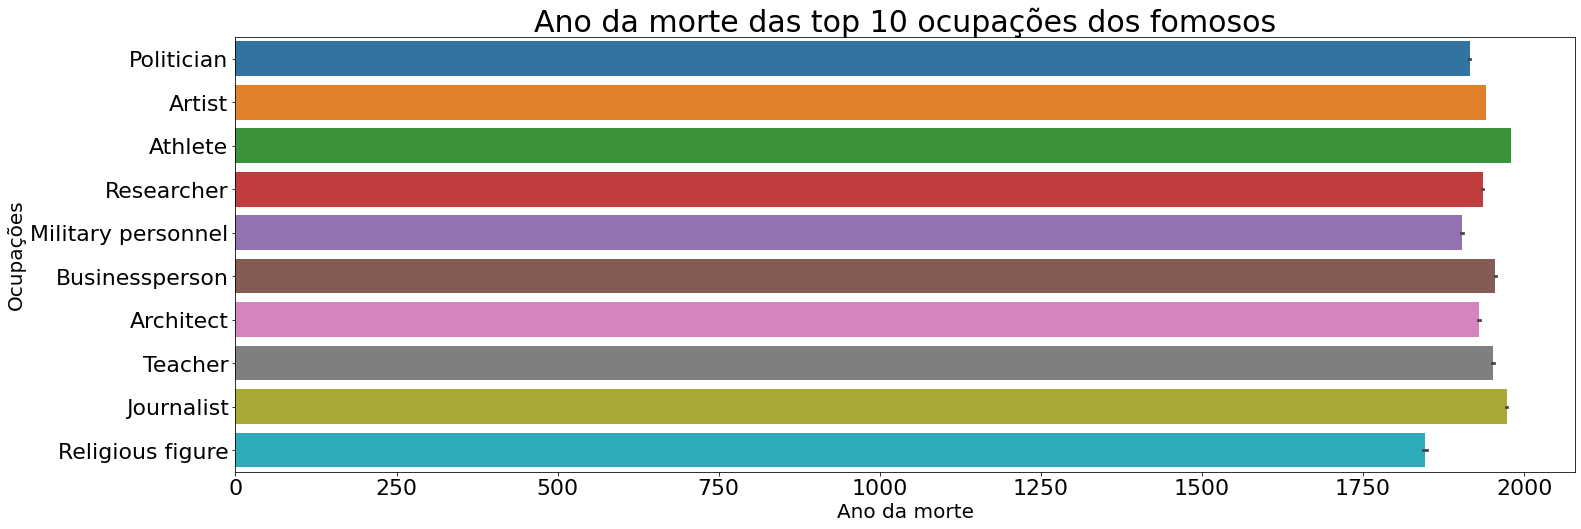

In [14]:
# Ajustando o tamanho da Figura

plt.figure(figsize = (24, 8)) ## Tamanho da figura em polegadas

sns.barplot(data = df, x='Death year', y=df_occupation.Occupation)

# Coloca o titulo
plt.title('Ano da morte das top 10 ocupações dos fomosos', fontsize = 30)

# Titulo para eixo X
plt.xlabel('Ano da morte', fontsize=20)

# Titulo para eixo Y
plt.ylabel('Ocupações', fontsize=20)

# Tamanho da fonte da grade X
plt.xticks(fontsize = 22)

# Tamanho da fonte da grade Y
plt.yticks(fontsize = 22)

# Mostra o nosso Gráfico
plt.show()


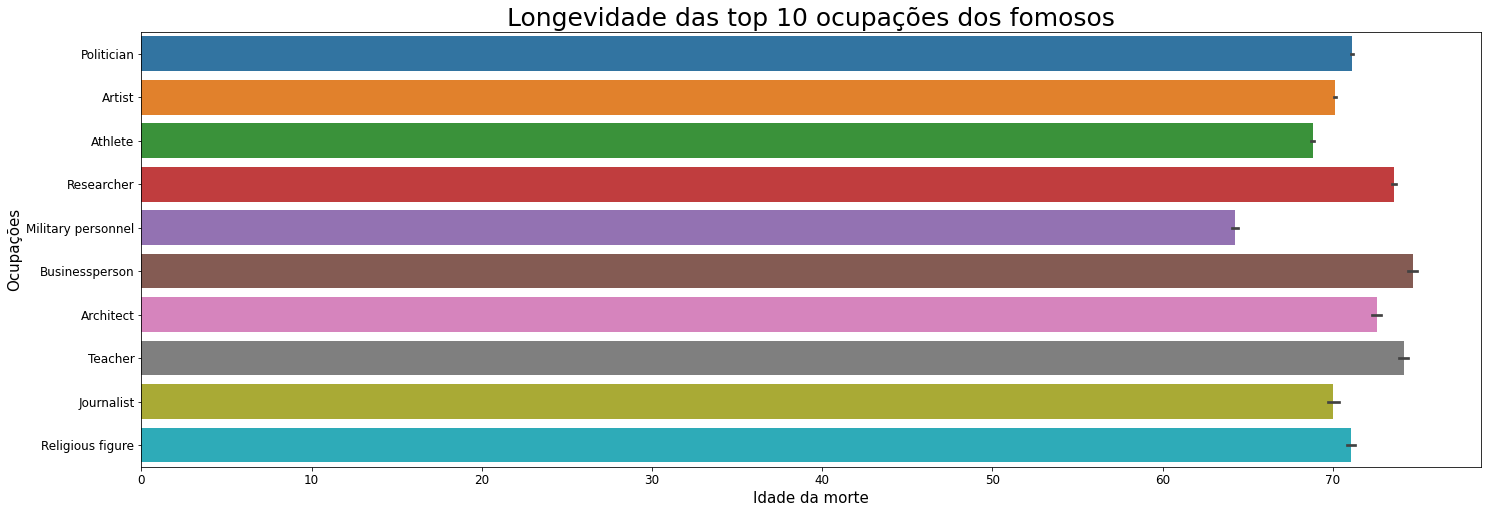

In [18]:
# Ajustando o tamanho da Figura

plt.figure(figsize = (24, 8)) ## Tamanho da figura em polegadas

sns.barplot(data = df, y=df_occupation.Occupation, x='Age of death')

# Coloca o titulo
plt.title('Longevidade das top 10 ocupações dos fomosos', fontsize = 25)

# Titulo para eixo X
plt.xlabel('Idade da morte', fontsize=15)

# Titulo para eixo Y
plt.ylabel('Ocupações', fontsize=15)

# Tamanho da fonte da grade X
plt.xticks(fontsize = 12)

# Tamanho da fonte da grade Y
plt.yticks(fontsize = 12)

# Mostra o nosso Gráfico
plt.show()
